In [2]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [469]:
df = pd.read_csv('interval.txt', delimiter=';')

FileNotFoundError: File b'interval.txt' does not exist

In [ ]:
IntersectionNames = ['I2','I3','I4','I5','I6','I7','I8','I9']

In [ ]:
df.tail(100)

In [ ]:
df.iloc[:,1:4].head()

In [ ]:
df.iloc[:,29:33].head(5)

In [491]:
def ParenthesesConverter(x):
    return x.replace('(','').replace(')','')

In [ ]:
new_df = df.copy().replace('()',0).replace(to_replace=r'^(.*)$', value='1', regex=True)

In [ ]:
new_df.head(100)

In [ ]:
new_df.iloc[:,2].head(100)


In [ ]:
IntersectionIn_df = pd.DataFrame(columns = IntersectionNames)

In [ ]:
d1 = pd.DataFrame(np.zeros((df.index[0], 1)))
for i in range(0,8):
    s1 = pd.concat([d1,new_df.iloc[:,i*4+1:i*4+5]], axis=1)

In [ ]:
new_df.iloc[:,1:5].sum(axis = 1).tail(100)

In [ ]:
new_df.iloc[:,2*4+1:2*4+5].sum(axis = 0)

In [ ]:
df_01 = new_df.iloc[:,1] + new_df.iloc[:,2]
df_01.iloc[1500:1800].plot()

In [ ]:
df_edge_detection = pd.DataFrame(np.zeros((df.index[0], 16)))
for i in range(16):
    df_edge_detection.iloc[:,i] = new_df.iloc[:,2*i+1] + new_df.iloc[:,2*i+2]

In [ ]:
df_edge_detection.iloc[1500:1800,0].plot()

In [ ]:
df_edge_detection.iloc[2900:3500,9].plot()

In [ ]:
df_edge_detection.iloc[2900:3500,7].plot()

In [ ]:
df_edge_detection.iloc[2900:3500,6].plot()

In [ ]:
df_edge_detection.iloc[2900:3500,8].plot()

In [82]:
# Get All vehicle ID from Route file
import xml.etree.ElementTree as ET
tree = ET.parse('AL69_14intersections.rou.xml')
root = tree.getroot()
vehicle = root.findall('vehicle')

In [83]:
# store List of ID into the txt file
carIDList = []
with open('carIDFile14Intersections.txt', "w") as carIDFile:
    for car in vehicle:
        car_id = car.get('id')
        carIDList.append(car_id)
        carIDFile.write(car_id+',')

In [513]:
df2.loc[df2['e1Detector_E45_0_12'].str.contains("('down_19',)")].index[0]

C:\Users\byang12\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


229

In [ ]:
detectorName = list(df.columns)[1:]

In [ ]:
detectorName[1][11:14]

In [ ]:
df_ID_Edge_Time.drop(df_ID_Edge_Time.index, inplace=True)

In [ ]:
df_ID_Edge_Time = pd.DataFrame(columns =  ["carID", "Edge", "Timestamp"])

In [ ]:
i = 0
for carID in carIDList:
    for edge in detectorName:
        record = df.loc[df[edge].str.contains("('"+carID+"',)")]
        if not record.empty:
            df_ID_Edge_Time.loc[i] = [carID,edge[11:14],record.index[0]]
            i = i + 1

In [ ]:
df_ID_Edge_Time.head(100)

In [ ]:
df_ID_Edge_Time.loc[df_ID_Edge_Time['Edge'] == 'E45']

In [ ]:
df_ID_Edge_Time[df_ID_Edge_Time.Timestamp != 1928]

In [ ]:
df_E76 = df_ID_Edge_Time[df_ID_Edge_Time.Timestamp != 1928].loc[df_ID_Edge_Time['Edge'] == 'E76'].copy()

In [ ]:
df_E65 = df_ID_Edge_Time[df_ID_Edge_Time.Timestamp != 1928].loc[df_ID_Edge_Time['Edge'] == 'E65'].copy()

In [ ]:
df_E76.describe()

In [ ]:
diffE65E76 = df_E65['Timestamp'].values - df_E76['Timestamp'].values

In [ ]:
bin_value = diffE65E76.max() - diffE65E76.min()

In [ ]:
diffE65E76_list = diffE65E76.tolist()

In [ ]:
plt.hist(diffE65E76_list,bins=bin_value)

In [ ]:
plt.plot(diffE65E76_list)

In [ ]:
df_E76['carID'][df_E76['carID'].duplicated()]

In [ ]:
df_ID_Edge_Time.loc[df_ID_Edge_Time['carID'] == 'up_697']

In [ ]:
differenceE56E45_list = df_ID_Edge_Time.loc[df_ID_Edge_Time['Edge'] == 'E56']['Timestamp'].values - df_ID_Edge_Time.loc[df_ID_Edge_Time['Edge'] == 'E45']['Timestamp'].values

In [ ]:
differenceE56E45_list.max()

In [ ]:
differenceE56E45_list.min()

In [ ]:
differenceE56E45_list = differenceE56E45_list.tolist()

In [ ]:
VEhicleIDLIST=df_ID_Edge_Time.loc[df_ID_Edge_Time['Edge'] == 'E56']['carID'].values.tolist()

In [ ]:
df_ID_diff = pd.DataFrame(data = differenceE56E45_list)

In [ ]:
df_ID_diff.hist()

In [ ]:
differenceE56E45_list

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(differenceE56E45_list,bins=70)

In [ ]:
plt.plot(differenceE56E45_list)

In [ ]:
differenceE65E76_list = df_ID_Edge_Time.loc[df_ID_Edge_Time['Edge'] == 'E65']['Timestamp'].values - df_ID_Edge_Time.loc[df_ID_Edge_Time['Edge'] == 'E76']['Timestamp'].values

In [ ]:
df_Detector9 = df_edge_detection.iloc[:,9]

In [ ]:
df_Detector9.iloc[100:1100].plot()

In [ ]:
nums = [9,7,6,8]
intervalList = []
for num in nums:
    interval = 0
    detectorInterval = []
    for key, value in df_edge_detection.iloc[:,num].iteritems(): 
        if value == 0:
            interval = interval + 1
        else:
            if interval > 30:
                detectorInterval.append(interval)
                interval = 0
            else:
                interval = 0
    intervalList.append(detectorInterval)

In [ ]:
intervalList[1][1:]

In [ ]:
plt.hist(intervalList[1][1:],bins=[40, 50, 60, 70, 80, 90, 100,110])

In [ ]:
from __future__ import division

In [ ]:
intervalList[3][1:]

In [ ]:
intervals = intervalList[3][1:]
minInterval = min(intervals)
maxInterval = max(intervals)
plt.hist(intervals,bins=range(minInterval-minInterval%10,maxInterval-maxInterval%10+15,5))
plt.title("Detector " + str(8))
plt.xlabel('Range of Time (s)')
plt.ylabel('Frequency')

In [3]:
# More detailed CSV data
df1 = pd.read_csv('intervalNumBase.txt', delimiter=';')
df2 = pd.read_csv('intervalIDBaseEdge.txt', delimiter=';')
df3 = pd.read_csv('intervalNumBasedEdge.txt', delimiter=';')

In [4]:
df_intersection_crowd_size = pd.DataFrame(np.zeros((df1.index[0], 8)))
for i in range(8):
    df_intersection_crowd_size.iloc[:,i] = df1.iloc[:,i+73]

In [5]:
df_all_edge_detection = pd.DataFrame(np.zeros((df3.index[0], 32)))
for i in range(32):
    df_all_edge_detection.iloc[:,i] = df3.iloc[:,2*i+1] + df3.iloc[:,2*i+2]

In [6]:
df_traffic_light = pd.DataFrame(np.zeros((df3.index[0], 8)))
for i in range(65,73):
    temp = df3.iloc[:,i]/2    
    df_traffic_light.iloc[:,i-65] = temp.astype(int)

In [7]:
df_intersection_vehnum = pd.DataFrame(np.zeros((df3.index[0], 16)))
for i in range(73,89):   
    df_intersection_vehnum.iloc[:,i-73] = df3.iloc[:,i]

In [8]:
df_outIntersection_vehnum = pd.DataFrame(np.zeros((df3.index[0], 16)))
for i in range(89,105):   
    df_outIntersection_vehnum.iloc[:,i-89] = df3.iloc[:,i]

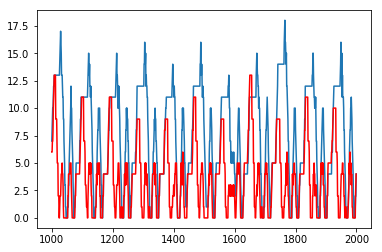

In [15]:
# Just vehicle drive into the intersection
plt.figure()
plt.plot(df_intersection_crowd_size.iloc[1000:2000,3])
plt.plot(df_intersection_vehnum.iloc[1000:2000,6]+df_intersection_vehnum.iloc[1000:2000,7],color='red')

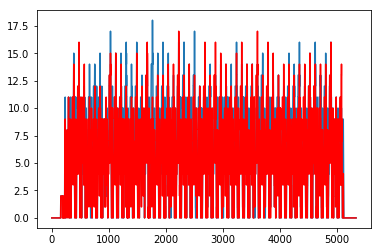

In [17]:
# Both vehicle drive in and out the intersection
plt.figure()
plt.plot(df_intersection_crowd_size.iloc[:,3])
plt.plot(df_intersection_vehnum.iloc[:,6]+df_intersection_vehnum.iloc[:,7]+df_outIntersection_vehnum.iloc[:,6]+df_outIntersection_vehnum.iloc[:,7],color='red')

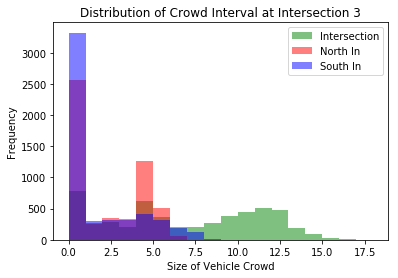

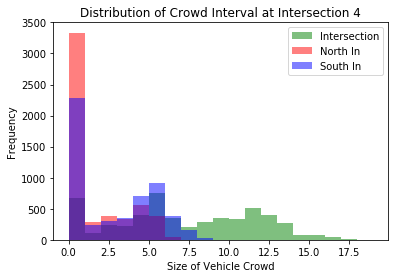

In [139]:
for i in range(3,5,1):
    plt.figure()
    minCrowdSize = min(df_intersection_crowd_size.iloc[:,i])
    maxCrowdSize = max(df_intersection_crowd_size.iloc[:,i])
    plt.hist(df_intersection_crowd_size.iloc[:,i],bins=range(minCrowdSize,maxCrowdSize+1,1),color='green',alpha = 0.5,label='Intersection')
    plt.hist(df_intersection_vehnum.iloc[:,i*2],bins=range(minCrowdSize,maxCrowdSize+1,1),color='red',alpha = 0.5,label='North In')
    plt.hist(df_intersection_vehnum.iloc[:,i*2+1],bins=range(minCrowdSize,maxCrowdSize+1,1),color='blue',alpha = 0.5,label='South In')
    plt.title("Distribution of Crowd Interval at Intersection " + str(i))
    plt.legend()
    plt.xlabel('Size of Vehicle Crowd')
    plt.ylabel('Frequency')

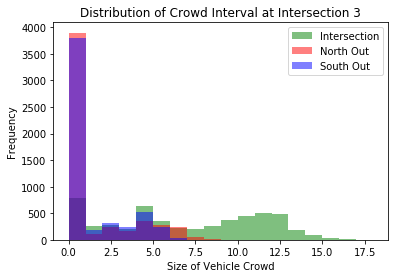

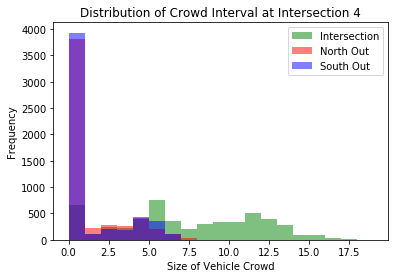

In [140]:
for i in range(3,5,1):
    plt.figure()
    minCrowdSize = min(df_intersection_crowd_size.iloc[:,i])
    maxCrowdSize = max(df_intersection_crowd_size.iloc[:,i])
    plt.hist(df_intersection_crowd_size.iloc[:,i],bins=range(minCrowdSize,maxCrowdSize+1,1),color='green',alpha = 0.5,label='Intersection')
    plt.hist(df_outIntersection_vehnum.iloc[:,i*2],bins=range(minCrowdSize,maxCrowdSize+1,1),color='red',alpha = 0.5,label='North Out')
    plt.hist(df_outIntersection_vehnum.iloc[:,i*2+1],bins=range(minCrowdSize,maxCrowdSize+1,1),color='blue',alpha = 0.5,label='South Out')
    plt.title("Distribution of Crowd Interval at Intersection " + str(i))
    plt.legend()
    plt.xlabel('Size of Vehicle Crowd')
    plt.ylabel('Frequency')

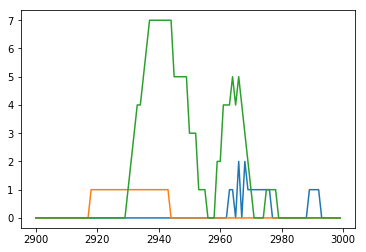

In [84]:
plt.plot(df_all_edge_detection.iloc[2900:3000,22])
plt.plot(df_traffic_light.iloc[2900:3000,3])
plt.plot(df_intersection_vehnum.iloc[2900:3000,7])

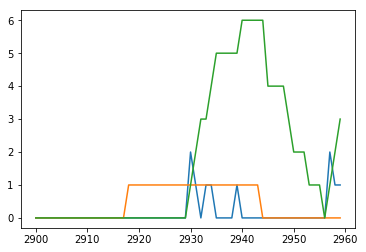

In [85]:
plt.plot(df_all_edge_detection.iloc[2900:2960,8]) #
plt.plot(df_traffic_light.iloc[2900:2960,4])
plt.plot(df_intersection_vehnum.iloc[2900:2960,8])

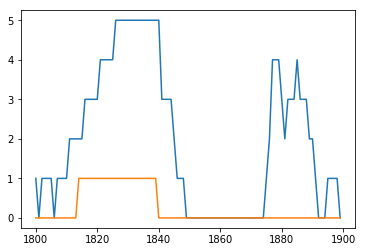

In [9]:
plt.plot(df_intersection_vehnum.iloc[1800:1900,2])
plt.plot(df_traffic_light.iloc[1800:1900,1])

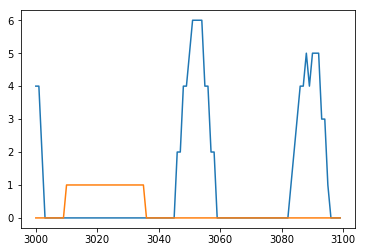

In [87]:
plt.plot(df_outIntersection_vehnum.iloc[3000:3100,8])
plt.plot(df_traffic_light.iloc[3000:3100,4])

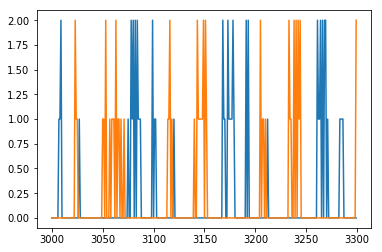

In [88]:
plt.plot(df_all_edge_detection.iloc[3000:3300,6])
plt.plot(df_all_edge_detection.iloc[3000:3300,8])
#plt.plot(df_traffic_light.iloc[3000:3100,4])
#plt.plot(df_outIntersection_vehnum.iloc[3000:3100,9])

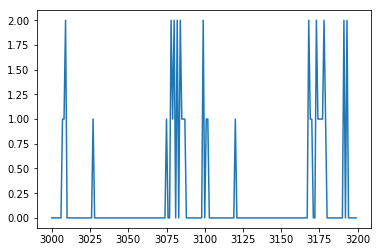

In [89]:
plt.plot(df_all_edge_detection.iloc[3000:3200,6])

In [550]:
# caculate the interval between vehicle crowd, I5(detc 6 7) I6(detc 8 9) Not accurate --V1.0
nums = [6,7,8,9]
intervalList = []
minCrowdSize = 3
maxTimeIntervalInCrowd = 3
for num in nums:
    interval = 0
    detectorInterval = []
    currentTimeIntervalInCrowd = 0
    currentCrowdSize = 0
    crowdFlag = 0
    for key, value in df_all_edge_detection.iloc[:,num].iteritems(): 
        if value == 0:
            interval = interval + 1
            if interval > maxTimeIntervalInCrowd:
                crowdFlag = 0
                currentCrowdSize = 0
        else:
            currentCrowdSize = currentCrowdSize + 1
            if currentCrowdSize >= minCrowdSize:
                if crowdFlag == 0:
                    detectorInterval.append(interval)
                crowdFlag = 1
                interval = 0
            else:
                # if current veh# < 3, interval still increase
                interval = interval + 1
    intervalList.append(detectorInterval)

In [68]:
# caculate the interval between vehicle crowd, I5(detc 6 7) I6(detc 8 9)  --V2.0

nums = [6,7,8,9]
intervalList = []
minCrowdSize = 3
maxTimeIntervalInCrowd = 3

for num in nums:
    interval = 0
    firstVehicleInterval = 0
    detectorInterval = []
    currentTimeIntervalInCrowd = 0
    currentCrowdSize = 0
    crowdFlag = 0
    firstVehicleFlag = 0
    for key, value in df_all_edge_detection.iloc[:,num].iteritems(): 
        interval = interval + 1
        if value == 0:
            if interval == maxTimeIntervalInCrowd:
                crowdFlag = 0
                currentCrowdSize = 0
            elif interval > maxTimeIntervalInCrowd:
                crowdFlag = 0
            else:
                currentCrowdSize = currentCrowdSize

            if firstVehicleFlag == 1 and interval - firstVehicleInterval >= maxTimeIntervalInCrowd:
                currentCrowdSize = 0
                firstVehicleFlag = 0
                firstVehicleInterval = 0

        else:
            currentCrowdSize = currentCrowdSize + 1        
            if currentCrowdSize >= minCrowdSize:            
                if crowdFlag == 0:
                    detectorInterval.append(firstVehicleInterval)
                    firstVehicleInterval = 0
                    firstVehicleFlag = 0
                crowdFlag = 1
                interval = 0
            elif currentCrowdSize == 1:
                if crowdFlag == 0:
                    firstVehicleInterval = interval
                    firstVehicleFlag = 1
            else:
                # if current 1< veh# < 3, interval still increase
                continue
    intervalList.append(detectorInterval)

In [64]:
a = [(1,11),(2,22),(3,33)]

In [67]:
a[2][0]

3

In [81]:
# test the result

test_list = [1,1,1,1,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0]
df_test_list = pd.DataFrame(test_list,columns =  ["size"])

minCrowdSize = 3
maxIntervalInCrowd = 3

interval = 0
firstVehicleInterval = 0
detectorInterval = []
currentTimeIntervalInCrowd = 0
currentCrowdSize = 0
crowdFlag = 0
firstVehicleFlag = 0
crowdSizeList = []
for key, value in df_test_list["size"].iteritems(): 
    interval = interval + 1
    if value == 0:
        if firstVehicleFlag == 1 and interval - firstVehicleInterval >= maxIntervalInCrowd:
            currentCrowdSize = 0
            firstVehicleFlag = 0
            firstVehicleInterval = 0
                    
        if interval == maxIntervalInCrowd and crowdFlag == 1:
            crowdSizeList.append(currentCrowdSize)
            crowdFlag = 0
            currentCrowdSize = 0
        
    else:
        currentCrowdSize = currentCrowdSize + 1        
        if currentCrowdSize >= minCrowdSize:            
            if crowdFlag == 0:
                detectorInterval.append(firstVehicleInterval)
                firstVehicleInterval = 0
                firstVehicleFlag = 0
            crowdFlag = 1
            interval = 0
        elif currentCrowdSize == 1:
            if crowdFlag == 0:
                firstVehicleInterval = interval
                firstVehicleFlag = 1
        else:
            # if current 1< veh# < 3, interval still increase
            continue

if crowdFlag == 1:
    crowdSizeList.append(currentCrowdSize)
            
print(detectorInterval)
print(crowdSizeList)

[1, 4, 11, 6, 8, 7]
[4, 6, 5, 7, 3, 4]


In [95]:
# combine the approach interarrival data into the intersection interarrival data
intersectionArrivalIntervalList = []
for i in range(0,len(intervalList),2):
    intersectionArrivalIntervalList.append(intervalList[i][1:] + intervalList[i+1][1:])

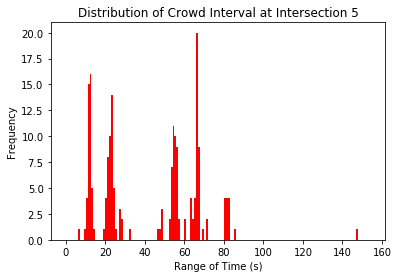

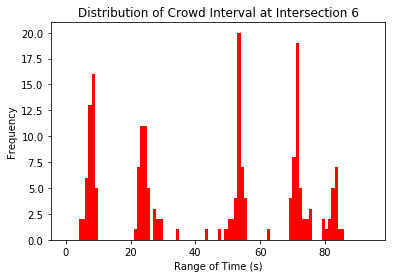

In [96]:
for i in range(2):
    plt.figure()
    minInterval = min(intersectionArrivalIntervalList[i])
    maxInterval = max(intersectionArrivalIntervalList[i])
    plt.hist(intersectionArrivalIntervalList[i],bins=range(minInterval-minInterval%10,maxInterval-maxInterval%10+15,1),color='red')
    plt.title("Distribution of Crowd Interval at Intersection " + str(i+5))
    plt.xlabel('Range of Time (s)')
    plt.ylabel('Frequency')

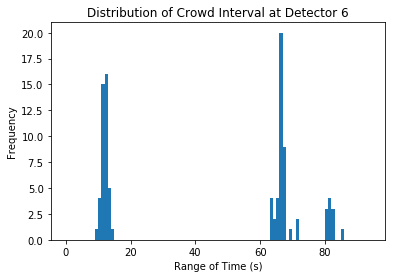

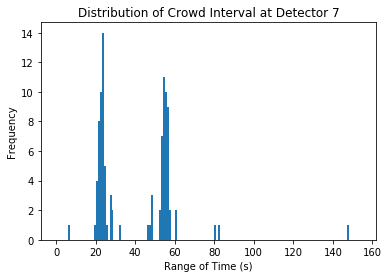

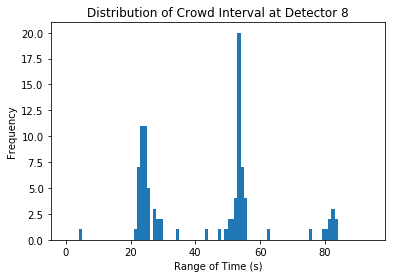

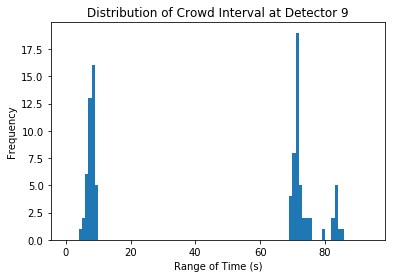

In [97]:
for num in nums:
    plt.figure()
    minInterval = min(intervalList[num-6][1:])
    maxInterval = max(intervalList[num-6][1:])
    plt.hist(intervalList[num-6][1:],bins=range(minInterval-minInterval%10,maxInterval-maxInterval%10+15,1))
    plt.title("Distribution of Crowd Interval at Detector " + str(num))
    plt.xlabel('Range of Time (s)')
    plt.ylabel('Frequency')

In [18]:
# the following is to caculate the link delay
# up and down link
detectorDownNameList = ["e1Detector_E12_0_0","e1Detector_E12_1_1","e1Detector_E23_0_4","e1Detector_E23_1_5",
                        "e1Detector_E34_0_8","e1Detector_E34_1_9","e1Detector_E45_0_12","e1Detector_E45_1_13",
                        "e1Detector_E56_0_16","e1Detector_E56_1_17","e1Detector_E67_0_20","e1Detector_E67_1_21",
                        "e1Detector_E78_0_24","e1Detector_E78_1_25","e1Detector_E89_0_28","e1Detector_E89_1_29"]
detectorUpNameList = ["e1Detector_E09_1_30","e1Detector_E09_0_31","e1Detector_E98_1_26","e1Detector_E98_0_27",
                      "e1Detector_E87_1_22","e1Detector_E87_0_23","e1Detector_E76_1_18","e1Detector_E76_0_19",
                      "e1Detector_E65_1_14","e1Detector_E65_0_15","e1Detector_E54_1_10","e1Detector_E54_0_11",
                      "e1Detector_E43_1_6","e1Detector_E43_0_7","e1Detector_E32_1_2","e1Detector_E32_0_3"]
detectorOutDownNameList = ["out_e1Detector_E23_0_4","out_e1Detector_E23_1_5","out_e1Detector_E34_0_8","out_e1Detector_E34_1_9",
                           "out_e1Detector_E45_0_12","out_e1Detector_E45_1_13","out_e1Detector_E56_0_16","out_e1Detector_E56_1_17",
                           "out_e1Detector_E67_0_20","out_e1Detector_E67_1_21","out_e1Detector_E78_0_24","out_e1Detector_E78_1_25",
                           "out_e1Detector_E89_0_28","out_e1Detector_E89_1_29","out_e1Detector_E90_1_30","out_e1Detector_E90_0_31"]
detectorOutUpNameList = ["out_e1Detector_E98_1_26","out_e1Detector_E98_0_27","out_e1Detector_E87_1_22","out_e1Detector_E87_0_23",
                         "out_e1Detector_E76_1_18","out_e1Detector_E76_0_19","out_e1Detector_E65_1_14","out_e1Detector_E65_0_15",
                         "out_e1Detector_E54_1_10","out_e1Detector_E54_0_11","out_e1Detector_E43_1_6","out_e1Detector_E43_0_7",
                         "out_e1Detector_E32_1_2","out_e1Detector_E32_0_3","out_e1Detector_E21_0_0","out_e1Detector_E21_1_1"]

carIDFile = open('carIDFile.txt', "r")
for line in carIDFile:
    carIDList = line.split(",")
carIDFile.close() 

carDownIDList = []
carUpIDList = []
for carID in carIDList:
    if carID[0] == "u":
        carUpIDList.append(carID)
    else:
        carDownIDList.append(carID)

In [19]:
df_ID_DownEdge_Time = pd.DataFrame(columns =  ["carID", "DownEdge", "Timestamp"])
i = 0
for carID in carDownIDList:
    for edge in detectorDownNameList:
        record = df2.loc[df2[edge].str.contains("('"+carID+"',)")]
        if not record.empty:
            df_ID_DownEdge_Time.loc[i] = [carID,edge[11:14],record.index[0]]
            i = i + 1

C:\Users\byang12\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


In [20]:
df_ID_UpEdge_Time = pd.DataFrame(columns =  ["carID", "UpEdge", "Timestamp"])
i = 0
for carID in carUpIDList:
    for edge in detectorUpNameList:
        record = df2.loc[df2[edge].str.contains("('"+carID+"',)")]
        if not record.empty:
            df_ID_UpEdge_Time.loc[i] = [carID,edge[11:14],record.index[0]]
            i = i + 1

C:\Users\byang12\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


In [29]:
df_ID_DownOutEdge_Time = pd.DataFrame(columns =  ["carID", "DownEdge", "Timestamp"])
i = 0
for carID in carDownIDList:
    for edge in detectorOutDownNameList:
        record = df2.loc[df2[edge].str.contains("('"+carID+"',)")]
        if not record.empty:
            df_ID_DownOutEdge_Time.loc[i] = [carID,edge[15:18],record.index[0]]
            i = i + 1

C:\Users\byang12\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


In [30]:
df_ID_UpOutEdge_Time = pd.DataFrame(columns =  ["carID", "UpEdge", "Timestamp"])
i = 0
for carID in carUpIDList:
    for edge in detectorOutUpNameList:
        record = df2.loc[df2[edge].str.contains("('"+carID+"',)")]
        if not record.empty:
            df_ID_UpOutEdge_Time.loc[i] = [carID,edge[15:18],record.index[0]]
            i = i + 1

C:\Users\byang12\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


In [42]:
4%8

4

In [40]:
df_ID_DownEdge_Time.head(100)

,carID,DownEdge,Timestamp
0,down_4,E12,51
1,down_4,E23,72
2,down_4,E34,130
3,down_4,E45,157
4,down_4,E56,264
5,down_4,E67,317
6,down_4,E78,334
7,down_4,E89,408
8,down_5,E12,54
9,down_5,E23,76


In [50]:
df_ID_DownEdge_delay = pd.DataFrame(columns =  ["carID", "DownEdge", "delay"])
i = 0
for index, row in df_ID_DownEdge_Time.iterrows():
    if index%8 == 0:
        upStreamEdgeTimestamp = row['Timestamp']
    else:        
        downStreamEdgeTimestamp = row['Timestamp']
        df_ID_DownEdge_delay.loc[i] = [row['carID'],row['DownEdge'],downStreamEdgeTimestamp-upStreamEdgeTimestamp]
        i = i + 1
        upStreamEdgeTimestamp = row['Timestamp']

In [46]:
df_ID_UpEdge_delay = pd.DataFrame(columns =  ["carID", "UpEdge", "delay"])
i = 0
for index, row in df_ID_UpEdge_Time.iterrows():
    if index%8 == 0:
        upStreamEdgeTimestamp = row['Timestamp']
    else:        
        downStreamEdgeTimestamp = row['Timestamp']
        df_ID_UpEdge_delay.loc[i] = [row['carID'],row['UpEdge'],downStreamEdgeTimestamp-upStreamEdgeTimestamp]
        i = i + 1
        upStreamEdgeTimestamp = row['Timestamp']

In [47]:
df_ID_DownOutEdge_delay = pd.DataFrame(columns =  ["carID", "DownEdge", "delay"])
i = 0
for index, row in df_ID_DownOutEdge_Time.iterrows():
    if index%8 == 0:
        upStreamEdgeTimestamp = row['Timestamp']
    else:
        downStreamEdgeTimestamp = row['Timestamp']
        df_ID_DownOutEdge_delay.loc[i] = [row['carID'],row['DownEdge'],downStreamEdgeTimestamp-upStreamEdgeTimestamp]
        i = i + 1
        upStreamEdgeTimestamp = row['Timestamp']

In [48]:
df_ID_UpOutEdge_delay = pd.DataFrame(columns =  ["carID", "UpEdge", "delay"])
i = 0
for index, row in df_ID_UpOutEdge_Time.iterrows():
    if index%8 == 0:
        upStreamEdgeTimestamp = row['Timestamp']
    else:        
        downStreamEdgeTimestamp = row['Timestamp']
        df_ID_UpOutEdge_delay.loc[i] = [row['carID'],row['UpEdge'],downStreamEdgeTimestamp-upStreamEdgeTimestamp]
        i = i + 1
        upStreamEdgeTimestamp = row['Timestamp']

In [49]:
df_ID_DownOutEdge_delay[df_ID_DownOutEdge_delay['carID'] == 'down_48']

,carID,DownEdge,delay
175,down_48,E34,25
176,down_48,E45,66
177,down_48,E56,32
178,down_48,E67,66
179,down_48,E78,28
180,down_48,E89,63
181,down_48,E90,29


In [51]:
df_ID_DownEdge_delay[df_ID_DownEdge_delay['carID'] == 'down_48']

,carID,DownEdge,delay
175,down_48,E23,42
176,down_48,E34,23
177,down_48,E45,75
178,down_48,E56,65
179,down_48,E67,29
180,down_48,E78,18
181,down_48,E89,74


In [54]:
df_ID_UpEdge_delay['carID'].describe()

count        6635
unique        948
top       up_1373
freq            7
Name: carID, dtype: object

In [558]:
# caculate the interval between vehicle crowd, I5(detc 6 7) I6(detc 8 9)
detectorNums = [7,8]  # 7:upLink, 8:downLink
#intervalList = []
DelayList = []
minCrowdSize = 3
maxTimeIntervalInCrowd = 3
for detectorNum in detectorNums:
    interval = 0
    #detectorInterval = []
    intersectionDelayList = []
    crowdDelayList = []
    currentTimeIntervalInCrowd = 0
    currentCrowdSize = 0
    crowdFlag = 0
    for key, value in df_all_edge_detection.iloc[:,detectorNum].iteritems(): 
        if value == 0:
            interval = interval + 1
            if interval > maxTimeIntervalInCrowd:
                # caculate current crowd Delay, average of all vehicle
                if crowdFlag == 1:
                    intersectionDelayList.append(int(np.mean(crowdDelayList)))
                    crowdFlag = 0
                    currentCrowdSize = 0
                    crowdDelayList = []
                else:
                    continue                    
        else:
            currentCrowdSize = currentCrowdSize + 1
            
            if detectorNum == 8:
                for i in range(2):
                    name = detectorDownNameList[2+i]
                    if not df2[name][key] == '()':
                        vehicleID = df2[name][key][2:-3]
                        currentDelay = int(df_ID_DownEdge_delay['delay'][df_ID_DownEdge_delay['carID'] == vehicleID])
                        crowdDelayList.append(currentDelay)
            if detectorNum == 7:
                for i in range(2):
                    name = detectorUpNameList[2+i]
                    if not df2[name][key] == '()':
                        vehicleID = df2[name][key][2:-3]
                        currentDelay = int(df_ID_UpEdge_delay['delay'][df_ID_UpEdge_delay['carID'] == vehicleID])
                        crowdDelayList.append(currentDelay)             
            
            if currentCrowdSize == minCrowdSize:
                if crowdFlag == 0:
                    detectorInterval.append(interval)
                crowdFlag = 1
                interval = 0
            elif currentCrowdSize > minCrowdSize:
                crowdFlag = 1
                interval = 0
            else: # if current veh# < 3, interval still increase                
                interval = interval + 1
    #intervalList.append(detectorInterval)
    DelayList.append(intersectionDelayList)

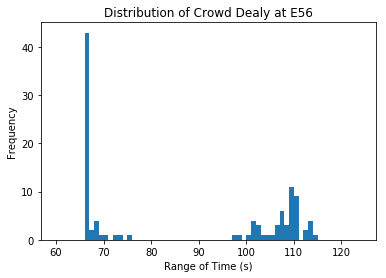

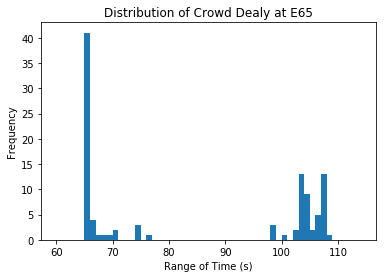

In [71]:
for num in detectorNums:
    if num-7:
        edge = "E65"
    else:
        edge = "E56"
    plt.figure()
    minDelay = min(DelayList[num-7][:])
    maxDelay = max(DelayList[num-7][:])
    plt.hist(DelayList[num-7][:],bins=range(minDelay-minDelay%10,maxDelay-maxDelay%10+15,1))
    plt.title("Distribution of Crowd Dealy at " + edge)
    plt.xlabel('Range of Time (s)')
    plt.ylabel('Frequency')

In [66]:
DelayList

[[75.599999999999994,
  109.33333333333333,
  66.25,
  106.85714285714286,
  66.272727272727266,
  101.16666666666667,
  66.25,
  109.2,
  68.384615384615387,
  113.0,
  66.307692307692307,
  110.33333333333333,
  66.166666666666671,
  113.59999999999999,
  73.461538461538467,
  108.5,
  66.299999999999997,
  110.85714285714286,
  66.083333333333329,
  107.57142857142857,
  66.545454545454547,
  101.83333333333333,
  66.166666666666671,
  98.799999999999997,
  68.692307692307693,
  108.42857142857143,
  66.090909090909093,
  114.2,
  69.538461538461533,
  110.85714285714286,
  66.166666666666671,
  103.2,
  66.07692307692308,
  109.5,
  66.545454545454547,
  112.59999999999999,
  66.230769230769226,
  101.0,
  66.272727272727266,
  109.0,
  66.083333333333329,
  109.85714285714286,
  67.166666666666671,
  110.0,
  66.083333333333329,
  110.16666666666667,
  66.181818181818187,
  112.0,
  66.285714285714292,
  70.799999999999997,
  109.0,
  68.0,
  107.75,
  66.272727272727266,
  113.0,

In [55]:
int(df_ID_DownEdge_delay['delay'][df_ID_DownEdge_delay['carID'] == 'down_19'])

65

In [39]:
name = detectorDownNameList[2]
df2[name][df2[name] == '(up_151),'].empty

True

In [30]:
df2['e1Detector_E45_0_12'][2525][2:-3]

'down_909'